<a href="https://colab.research.google.com/github/Josue-Echeverria/Rastreador-Donaciones/blob/main/Concurso_PIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch
from datetime import datetime, timedelta
import networkx as nx
import plotly.graph_objects as go
from pathlib import Path
import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
aportaciones = pd.read_excel('/content/drive/MyDrive/Concurso/acumulado.xlsx', sheet_name='BBDD')

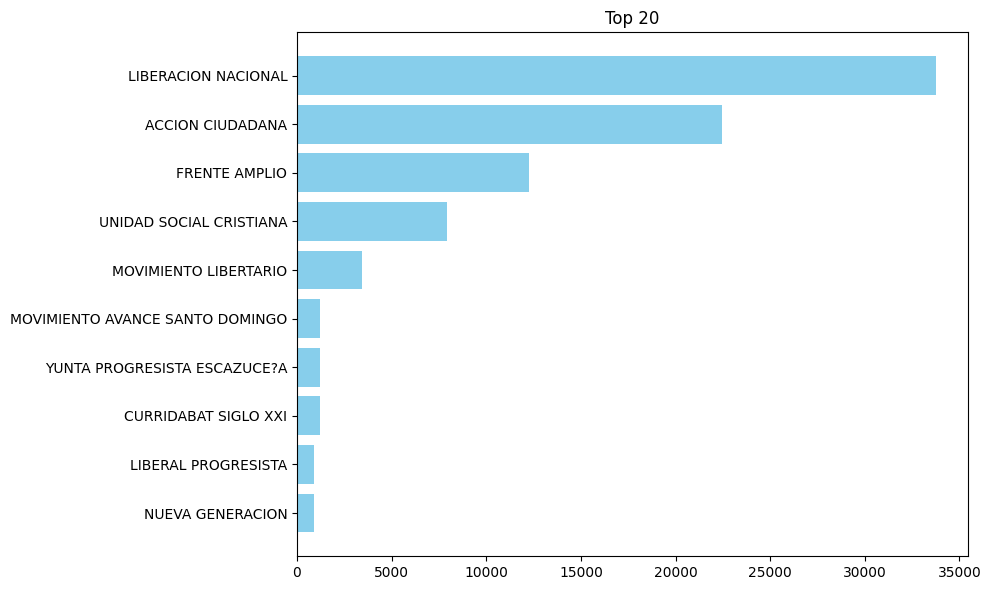

In [ ]:
# Filter out parties ending with "(INACTIVO)"
active_aportaciones = aportaciones[~aportaciones['PARTIDO POLÍTICO'].str.endswith('(INACTIVO)', na=False)]

party_contributions_count = active_aportaciones['PARTIDO POLÍTICO'].value_counts()

top_20 = party_contributions_count.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_20.index, top_20.values, color='skyblue')
plt.title('Top 20')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
def get_period(year):
    if pd.isna(year):
        return None
    # Extract the year from the Timestamp object
    year = year.year
    for partido, periodo in periodos.items():
        if periodo[0] <= year <= periodo[1]:
            return f'{periodo[0]}-{periodo[1]} ({partido})'
    return None

periodos = {'PPSD':[2022, 2026],
            'PAC 2':[2018, 2022],
            'PAC':[2014, 2018],
            'PLN':[2010, 2014],
            'PLN 2':[2006, 2010]}


aportaciones['PERIODO'] = aportaciones['FECHA'].apply(get_period)
display(aportaciones.head())

,TIPO CONTRIBUCIÓN,TIPO PERSONA,PARTIDO POLÍTICO,FECHA,CÉDULA,NOMBRE DEL CONTRIBUYENTE,MONTO,PERIODO
0,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-09-30,102910453,AVILA CHAVARRIA JORGE,5000000.0,2010-2014 (PLN)
1,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-09-30,901050856,MONTOYA CALDERON KRISIA MARIA,10000.0,2010-2014 (PLN)
2,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-10-31,102910453,AVILA CHAVARRIA JORGE,110000.0,2010-2014 (PLN)
3,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-10-31,105990938,FERNANDEZ SOLIS GILBERT PATRICIO,500000.0,2010-2014 (PLN)
4,EFECTIVO,Nacional,ACCESIBILIDAD SIN EXCLUSION,2010-10-31,700900647,VERLEY KNIGHT YELGI LAVINIA,30000.0,2010-2014 (PLN)


/tmp/ipython-input-569267433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aportaciones_valid_dates['MONTH_YEAR'] = aportaciones_valid_dates['FECHA'].dt.to_period('M')


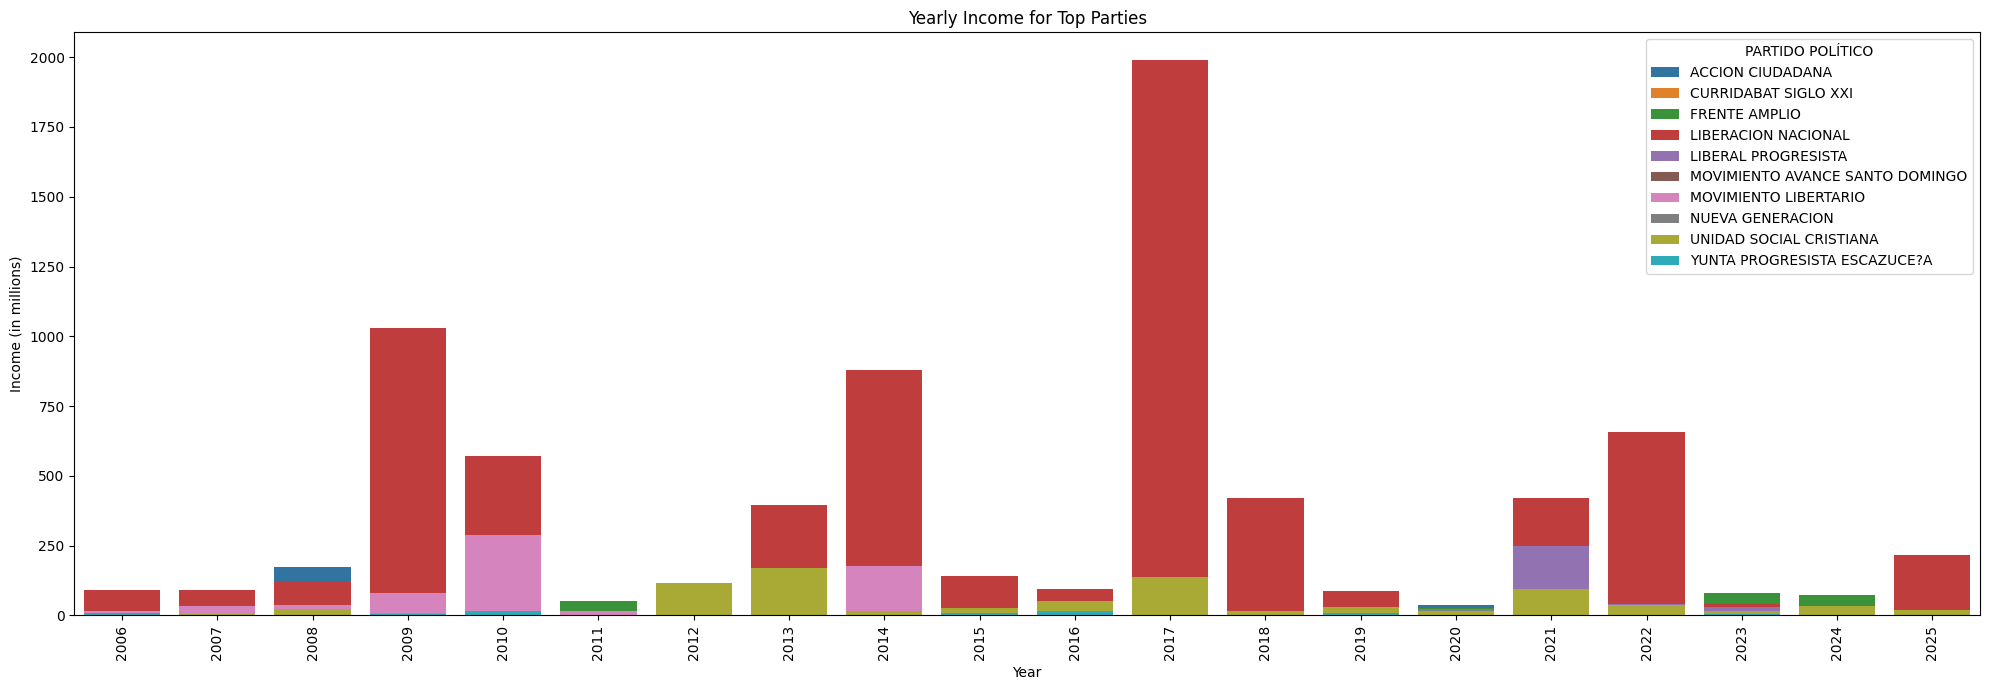

In [ ]:
# Select the top parties (you can adjust the number if needed)
aportaciones['FECHA'] = pd.to_datetime(aportaciones['FECHA'], errors='coerce')
aportaciones_valid_dates = aportaciones.dropna(subset=['FECHA'])
aportaciones_valid_dates['MONTH_YEAR'] = aportaciones_valid_dates['FECHA'].dt.to_period('M')
monthly_income = aportaciones_valid_dates.groupby(['PARTIDO POLÍTICO', 'MONTH_YEAR'])['MONTO'].sum().reset_index()
monthly_income['MONTH_YEAR'] = monthly_income['MONTH_YEAR'].dt.to_timestamp()
top_parties_list = top_20.index.tolist()
monthly_income_filtered = monthly_income[monthly_income['PARTIDO POLÍTICO'].isin(top_parties_list)].copy()
monthly_income_filtered['MONTO'] = monthly_income_filtered['MONTO'] / 1_000_000
monthly_income_filtered['YEAR'] = monthly_income_filtered['MONTH_YEAR'].dt.to_period('Y').astype(str)

yearly_income = monthly_income_filtered.groupby(['PARTIDO POLÍTICO', 'YEAR'])['MONTO'].sum().reset_index()

plt.figure(figsize=(20, 7))
sns.barplot(data=yearly_income, x='YEAR', y='MONTO', hue='PARTIDO POLÍTICO', dodge=False) # dodge=False for overlapping bars

plt.title('Yearly Income for Top Parties')
plt.xlabel('Year')
plt.ylabel('Income (in millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import os

folder = "/content/drive/MyDrive/Concurso/Contratos"
try:
    if not os.path.isdir(folder):
        raise FileNotFoundError(f"Folder not found: {folder}")

    all_files = [
        os.path.join(folder, f)
        for f in os.listdir(folder)
        if f.lower().endswith('.xlsx')
    ]

    dataframes = []
    for file in all_files:
        try:
            df = pd.read_excel(file, sheet_name='Informacion de contratos')
            dataframes.append(df)
        except Exception as e:
            print(f"Skipping file {file} due to error: {e}")

    if not dataframes:
        raise ValueError("No valid files could be loaded.")

    contratos = pd.concat(dataframes, ignore_index=True)
    contratos.head()
except Exception as e:
    print(f"Error: {e}")


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

In [ ]:
aportaciones['CÉDULA'].value_counts()

,count
CÉDULA,
105480272,234
109770645,199
103550404,192
105461000,171
601230166,156
...,...
104010024,1
105760638,1
106550787,1


In [ ]:
contratos['Cédula Proveedor'].value_counts()

,count
Cédula Proveedor,
3101005744,3078
3101089260,3030
3101130983,2608
3101313740,2424
3101005113,2348
...,...
3101136493,1
3101174246,1
3101314978,1


In [6]:
ruta_drive = '/content/drive/MyDrive/Concurso/Contratos/'  # Ajusta esta ruta

# Cargar todos los archivos Excel
archivos = glob.glob(ruta_drive + '*.xlsx')
print(f"Archivos encontrados: {len(archivos)}")

# Lista para almacenar los dataframes
dfs = []

# Leer cada archivo
for archivo in archivos:
    try:
        df = pd.read_excel(archivo)
        # Asegurarse de que existan las columnas necesarias
        if 'Cédula Proveedor' in df.columns and 'Nro Contrato' in df.columns:
            dfs.append(df[['Nro Contrato', 'Cédula Proveedor', 'Identificador']].copy())
        print(f"Cargado: {Path(archivo).name}")
    except Exception as e:
        print(f"Error en {Path(archivo).name}: {e}")

# Combinar todos los dataframes
df_completo = pd.concat(dfs, ignore_index=True)
print(f"\nTotal de registros: {len(df_completo)}")

# Limpiar datos
df_completo = df_completo.dropna(subset=['Cédula Proveedor'])
df_completo['Cédula Proveedor'] = df_completo['Cédula Proveedor'].astype(str)

# Obtener top proveedores por número de contratos
top_n = 50  # Ajusta según necesites
top_proveedores = df_completo['Cédula Proveedor'].value_counts().head(top_n)
print(f"\nTop {top_n} proveedores:")
print(top_proveedores)

# Filtrar dataset para incluir solo top proveedores
df_filtrado = df_completo[df_completo['Cédula Proveedor'].isin(top_proveedores.index)]
"""
"""

# Guarda

Archivos encontrados: 31


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072021-122021.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072023-122023.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012025-062025.xlsx
Cargado: 012021-062021.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012024-062024.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012023-062023.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012022-062022.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012016-062016.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072016-122016.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012017-062017.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012018-062018.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072018-122018.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 012019-062019.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072019-122019.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072020-122020.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072010-122010.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072011-122011.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072012-122012.xlsx


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cargado: 072015-122015.xlsx
Cargado: 072014-122014.xlsx
Cargado: 012012-062012.xlsx
Cargado: 072017-122017.xlsx
Cargado: 012020-062020.xlsx
Cargado: 072022-122022.xlsx
Cargado: 012015-062015.xlsx
Cargado: 012014-062014.xlsx
Cargado: 012013-062013.xlsx
Cargado: 012010-062010.xlsx
Cargado: 072024-122024.xlsx
Cargado: 072013-122013.xlsx
Cargado: 012011-062011.xlsx

Total de registros: 396676

Top 50 proveedores:
Cédula Proveedor
3101005744    3078
3101089260    3030
3101130983    2608
3101313740    2424
3101005113    2348
3102004255    1874
3101095144    1709
3101576808    1629
3006101757    1596
3101257737    1589
3101279006    1519
3101667782    1518
3101082969    1482
3101244831    1455
3101111502    1450
3101303248    1430
3101095926    1355
3101047695    1300
3101083376    1292
3101190164    1252
3101020826    1240
3101112933    1227
3101052993    1224
3101343092    1207
3101059552    1202
3101016469    1193
3101286770    1163
3101155082    1160
3101363887    1158
3101102844    1156


'\n'

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Cargar el dataset procesado
df = pd.read_csv('/content/drive/MyDrive/Concurso/contratos_procesados.csv')

print(f"Total de registros cargados: {len(df)}")

# Obtener top 50 proveedores
top_50 = df['Cédula Proveedor'].value_counts().head(50)
print(f"\nTop 50 proveedores por número de contratos:")
print(top_50)

# Filtrar dataset para top 50
df_top50 = df[df['Cédula Proveedor'].isin(top_50.index)].copy()
print(f"\nRegistros del top 50: {len(df_top50)}")

# Crear el grafo de red
G = nx.Graph()

# Diccionario para rastrear contratos por proveedor
proveedor_contratos = {}

# Construir el grafo
for _, row in df_top50.iterrows():
    proveedor = str(row['Cédula Proveedor'])
    contrato = str(row['Nro Contrato'])

    # Agregar nodos
    if not G.has_node(proveedor):
        G.add_node(proveedor, tipo='proveedor', num_contratos=0)
        proveedor_contratos[proveedor] = set()

    if not G.has_node(contrato):
        G.add_node(contrato, tipo='contrato')

    # Agregar arista
    G.add_edge(proveedor, contrato)
    proveedor_contratos[proveedor].add(contrato)

# Actualizar contador de contratos
for proveedor, contratos in proveedor_contratos.items():
    G.nodes[proveedor]['num_contratos'] = len(contratos)

print(f"\nEstadísticas del grafo:")
print(f"Total de nodos: {G.number_of_nodes()}")
print(f"Total de aristas: {G.number_of_edges()}")
print(f"Proveedores: {sum(1 for n in G.nodes() if G.nodes[n]['tipo'] == 'proveedor')}")
print(f"Contratos: {sum(1 for n in G.nodes() if G.nodes[n]['tipo'] == 'contrato')}")

# LAYOUT OPTIMIZADO: Usar layout radial/circular para grafos grandes
print("\nGenerando layout del grafo (método optimizado)...")

pos = {}

# Posicionar proveedores en círculo
proveedores = [n for n in G.nodes() if G.nodes[n]['tipo'] == 'proveedor']
n_prov = len(proveedores)

for i, prov in enumerate(proveedores):
    angle = 2 * np.pi * i / n_prov
    # Radio fijo para proveedores
    radius = 3.0
    pos[prov] = (radius * np.cos(angle), radius * np.sin(angle))

# Posicionar contratos alrededor de sus proveedores
for prov in proveedores:
    contratos = list(G.neighbors(prov))
    n_contratos = len(contratos)

    # Posición del proveedor
    prov_x, prov_y = pos[prov]

    # Distribuir contratos en círculo alrededor del proveedor
    for j, contrato in enumerate(contratos):
        angle_offset = 2 * np.pi * j / n_contratos
        # Radio variable según cantidad de contratos (más denso = más cerca)
        contract_radius = 0.3 + (n_contratos / 1000) * 0.2  # Ajustable

        pos[contrato] = (
            prov_x + contract_radius * np.cos(angle_offset),
            prov_y + contract_radius * np.sin(angle_offset)
        )

print("Layout generado exitosamente!")

# Preparar trazas de aristas (muestrear para mejor rendimiento)
edge_x = []
edge_y = []

# Muestrear aristas si hay demasiadas (para mejor rendimiento visual)
edges_sample = list(G.edges())
max_edges = 5000  # Limitar aristas visibles
if len(edges_sample) > max_edges:
    import random
    edges_sample = random.sample(edges_sample, max_edges)
    print(f"Mostrando {max_edges} de {G.number_of_edges()} aristas para mejor rendimiento")

for edge in edges_sample:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.2, color='rgba(100, 100, 100, 0.15)'),
    hoverinfo='none',
    showlegend=False
)

# Preparar nodos de proveedores
prov_x = []
prov_y = []
prov_size = []
prov_text = []
prov_color = []

for node in G.nodes():
    if G.nodes[node]['tipo'] == 'proveedor':
        x, y = pos[node]
        prov_x.append(x)
        prov_y.append(y)
        num_contratos = G.nodes[node]['num_contratos']
        prov_size.append(min(num_contratos * 0.02 + 20, 80))  # Tamaño ajustado
        prov_text.append(f"<b>Proveedor:</b> {node}<br><b>Contratos:</b> {num_contratos}")
        prov_color.append(num_contratos)

proveedor_trace = go.Scatter(
    x=prov_x,
    y=prov_y,
    mode='markers',
    marker=dict(
        size=prov_size,
        color=prov_color,
        colorscale='Hot',
        line=dict(width=2, color='rgba(255, 255, 255, 0.4)'),
        showscale=True,
        colorbar=dict(
            title="Nº Contratos",
            thickness=15,
            len=0.5,
            tickfont=dict(color='white')
        )
    ),
    text=prov_text,
    hoverinfo='text',
    name='Proveedores',
    showlegend=True
)

# Preparar nodos de contratos (muestrear para mejor rendimiento)
cont_x = []
cont_y = []
cont_text = []

contratos_nodes = [node for node in G.nodes() if G.nodes[node]['tipo'] == 'contrato']
max_contract_nodes = 10000  # Limitar nodos de contratos visibles

if len(contratos_nodes) > max_contract_nodes:
    import random
    contratos_nodes = random.sample(contratos_nodes, max_contract_nodes)
    print(f"Mostrando {max_contract_nodes} de {len([n for n in G.nodes() if G.nodes[n]['tipo'] == 'contrato'])} contratos")

for node in contratos_nodes:
    x, y = pos[node]
    cont_x.append(x)
    cont_y.append(y)
    cont_text.append(f"<b>Contrato:</b> {node}")

contrato_trace = go.Scatter(
    x=cont_x,
    y=cont_y,
    mode='markers',
    marker=dict(
        size=3,
        color='#ff4081',
        opacity=0.6,
        line=dict(width=0)
    ),
    text=cont_text,
    hoverinfo='text',
    name='Contratos',
    showlegend=True
)

# Crear figura
fig = go.Figure(data=[edge_trace, contrato_trace, proveedor_trace])

# Configurar layout
fig.update_layout(
    title=dict(
        text='<b>Red de Contratos - Top 50 Proveedores</b>',
        font=dict(size=24, color='white'),
        x=0.5,
        xanchor='center'
    ),
    showlegend=True,
    legend=dict(
        font=dict(color='white', size=12),
        bgcolor='rgba(0, 0, 0, 0.5)',
        bordercolor='rgba(255, 255, 255, 0.3)',
        borderwidth=1
    ),
    hovermode='closest',
    plot_bgcolor='#0d1117',
    paper_bgcolor='#0d1117',
    margin=dict(l=10, r=10, t=80, b=10),
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False,
        showline=False
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False,
        showline=False
    ),
    width=1200,
    height=1000
)

# Mostrar el grafo
fig.show()

# Estadísticas adicionales
print("\n" + "="*60)
print("ESTADÍSTICAS DE LA RED")
print("="*60)
print(f"\nTop 10 proveedores con más contratos:")
top_10_stats = sorted(
    [(node, G.nodes[node]['num_contratos'])
     for node in G.nodes() if G.nodes[node]['tipo'] == 'proveedor'],
    key=lambda x: x[1],
    reverse=True
)[:10]

for i, (prov, num_cont) in enumerate(top_10_stats, 1):
    print(f"{i:2d}. Proveedor {prov}: {num_cont} contratos")

print(f"\nDensidad de la red: {nx.density(G):.6f}")
print(f"Grado promedio: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

Total de registros cargados: 66042

Top 50 proveedores por número de contratos:
Cédula Proveedor
3101005744    3078
3101089260    3030
3101130983    2608
3101313740    2424
3101005113    2348
3102004255    1874
3101095144    1709
3101576808    1629
3006101757    1596
3101257737    1589
3101279006    1519
3101667782    1518
3101082969    1482
3101244831    1455
3101111502    1450
3101303248    1430
3101095926    1355
3101047695    1300
3101083376    1292
3101190164    1252
3101020826    1240
3101112933    1227
3101052993    1224
3101343092    1207
3101059552    1202
3101016469    1193
3101286770    1163
3101155082    1160
3101363887    1158
3101102844    1156
3101179050    1080
3101169216    1040
3101017208    1005
3101096527     985
3101090073     970
3101086562     951
3101211041     947
3101009515     935
3101035198     916
3101242129     913
3101080638     913
3002042023     909
3007042032     892
3101237629     886
3101007879     853
3101308225     813
3101295878     805
3101024094


ESTADÍSTICAS DE LA RED

Top 10 proveedores con más contratos:
 1. Proveedor 3101005744: 2835 contratos
 2. Proveedor 3101089260: 2791 contratos
 3. Proveedor 3101313740: 2351 contratos
 4. Proveedor 3101130983: 2304 contratos
 5. Proveedor 3101005113: 1923 contratos
 6. Proveedor 3102004255: 1707 contratos
 7. Proveedor 3006101757: 1498 contratos
 8. Proveedor 3101576808: 1497 contratos
 9. Proveedor 3101082969: 1391 contratos
10. Proveedor 3101667782: 1318 contratos

Densidad de la red: 0.000050
Grado promedio: 2.33


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Concurso/contratos_procesados.csv')

print(f"Total registros: {len(df)}")

# Análisis por proveedor
proveedor_stats = df.groupby('Cédula Proveedor').agg({
    'Nro Contrato': 'count',
    'Identificador': 'nunique'
}).reset_index()
proveedor_stats.columns = ['Proveedor', 'Total_Contratos', 'Contratos_Unicos']
proveedor_stats = proveedor_stats.sort_values('Total_Contratos', ascending=False)

# Top 30 para visualización
top_30 = proveedor_stats.head(30)

# Crear dashboard con subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Top 30 Proveedores por Número de Contratos',
        'Distribución de Contratos (Top 50)',
        'Concentración del Mercado',
        'Análisis de Diversificación'
    ),
    specs=[
        [{"type": "bar"}, {"type": "scatter"}],
        [{"type": "pie"}, {"type": "scatter"}]
    ],
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# 1. Barras horizontales - Top 30
fig.add_trace(
    go.Bar(
        y=top_30['Proveedor'].astype(str),
        x=top_30['Total_Contratos'],
        orientation='h',
        marker=dict(
            color=top_30['Total_Contratos'],
            colorscale='Hot',
            showscale=False
        ),
        text=top_30['Total_Contratos'],
        textposition='outside',
        hovertemplate='<b>Proveedor:</b> %{y}<br><b>Contratos:</b> %{x}<extra></extra>'
    ),
    row=1, col=1
)

# 2. Scatter plot - Distribución Top 50
top_50 = proveedor_stats.head(50)
fig.add_trace(
    go.Scatter(
        x=list(range(1, 51)),
        y=top_50['Total_Contratos'],
        mode='markers+lines',
        marker=dict(
            size=12,
            color=top_50['Total_Contratos'],
            colorscale='Hot',
            showscale=False,
            line=dict(width=1, color='white')
        ),
        line=dict(color='rgba(255, 64, 129, 0.5)', width=2),
        hovertemplate='<b>Rank:</b> %{x}<br><b>Contratos:</b> %{y}<extra></extra>'
    ),
    row=1, col=2
)

# 3. Pie chart - Concentración
top_10_total = proveedor_stats.head(10)['Total_Contratos'].sum()
top_50_total = proveedor_stats.head(50)['Total_Contratos'].sum()
resto = len(df) - top_50_total

concentracion = pd.DataFrame({
    'Grupo': ['Top 10', 'Top 11-50', 'Resto'],
    'Contratos': [top_10_total, top_50_total - top_10_total, resto]
})

fig.add_trace(
    go.Pie(
        labels=concentracion['Grupo'],
        values=concentracion['Contratos'],
        marker=dict(colors=['#ff1744', '#ff4081', '#ff80ab']),
        textinfo='label+percent',
        textfont=dict(size=12, color='white'),
        hovertemplate='<b>%{label}</b><br>Contratos: %{value}<br>Porcentaje: %{percent}<extra></extra>'
    ),
    row=2, col=1
)

# 4. Scatter - Análisis de diversificación
# Comparar proveedores: Total contratos vs Contratos únicos
top_50_div = proveedor_stats.head(50)
fig.add_trace(
    go.Scatter(
        x=top_50_div['Total_Contratos'],
        y=top_50_div['Contratos_Unicos'],
        mode='markers',
        marker=dict(
            size=10,
            color=top_50_div.index,
            colorscale='Viridis',
            showscale=False,
            line=dict(width=1, color='white')
        ),
        text=top_50_div['Proveedor'],
        hovertemplate='<b>Proveedor:</b> %{text}<br><b>Total Contratos:</b> %{x}<br><b>Contratos Únicos:</b> %{y}<extra></extra>'
    ),
    row=2, col=2
)

# Línea de referencia (contratos únicos = total)
max_val = top_50_div['Total_Contratos'].max()
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        line=dict(color='rgba(255, 255, 255, 0.3)', dash='dash', width=1),
        showlegend=False,
        hoverinfo='skip'
    ),
    row=2, col=2
)

# Configuración de ejes
fig.update_xaxes(title_text="Número de Contratos", row=1, col=1, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
fig.update_xaxes(title_text="Ranking", row=1, col=2, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
fig.update_xaxes(title_text="Total Contratos", row=2, col=2, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(title_text="Proveedor (Cédula)", row=1, col=1, showgrid=False)
fig.update_yaxes(title_text="Número de Contratos", row=1, col=2, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(title_text="Contratos Únicos", row=2, col=2, showgrid=True, gridcolor='rgba(255,255,255,0.1)')

# Layout general
fig.update_layout(
    title=dict(
        text='<b>Dashboard de Análisis de Contratos por Proveedor</b>',
        font=dict(size=22, color='white'),
        x=0.5,
        xanchor='center'
    ),
    showlegend=False,
    plot_bgcolor='#0d1117',
    paper_bgcolor='#0d1117',
    font=dict(color='white', size=10),
    height=1000,
    width=1400
)

fig.show()

# Estadísticas clave
print("\n" + "="*70)
print("ESTADÍSTICAS CLAVE")
print("="*70)
print(f"\nTotal de proveedores únicos: {proveedor_stats.shape[0]:,}")
print(f"Total de contratos: {len(df):,}")
print(f"Promedio de contratos por proveedor: {len(df) / proveedor_stats.shape[0]:.2f}")
print(f"\nConcentración del mercado:")
print(f"  - Top 10 proveedores: {top_10_total:,} contratos ({top_10_total/len(df)*100:.1f}%)")
print(f"  - Top 50 proveedores: {top_50_total:,} contratos ({top_50_total/len(df)*100:.1f}%)")
print(f"\nTop 5 proveedores:")
for i, row in proveedor_stats.head(5).iterrows():
    print(f"  {i+1}. {row['Proveedor']}: {row['Total_Contratos']:,} contratos")

Total registros: 66042



ESTADÍSTICAS CLAVE

Total de proveedores únicos: 50
Total de contratos: 66,042
Promedio de contratos por proveedor: 1320.84

Concentración del mercado:
  - Top 10 proveedores: 21,885 contratos (33.1%)
  - Top 50 proveedores: 66,042 contratos (100.0%)

Top 5 proveedores:
  6. 3101005744: 3,078 contratos
  21. 3101089260: 3,030 contratos
  30. 3101130983: 2,608 contratos
  45. 3101313740: 2,424 contratos
  5. 3101005113: 2,348 contratos


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Concurso/contratos_procesados.csv')

print(f"📊 Cargando datos...")
print(f"Total de registros: {len(df):,}")

# Análisis por proveedor
proveedor_counts = df['Cédula Proveedor'].value_counts().sort_values(ascending=False)
total_contratos = len(df)
n_proveedores = len(proveedor_counts)

print(f"Total de proveedores únicos: {n_proveedores:,}")
print(f"Total de contratos: {total_contratos:,}\n")

# ============================================================================
# 1. MÉTRICAS DE CONCENTRACIÓN
# ============================================================================

# Índice de Gini
def calcular_gini(x):
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum((np.arange(1, n + 1)) * sorted_x)) / (n * cumsum[-1]) - (n + 1) / n

gini = calcular_gini(proveedor_counts.values)

# HHI (Herfindahl-Hirschman Index)
market_shares = (proveedor_counts / total_contratos * 100) ** 2
hhi = market_shares.sum()

# CR (Concentration Ratio)
cr4 = (proveedor_counts.head(4).sum() / total_contratos * 100)
cr10 = (proveedor_counts.head(10).sum() / total_contratos * 100)
cr20 = (proveedor_counts.head(20).sum() / total_contratos * 100)

print("="*70)
print("📈 MÉTRICAS DE CONCENTRACIÓN")
print("="*70)
print(f"\n🔢 Índice de Gini: {gini:.4f}")
print(f"   Interpretación: ", end="")
if gini > 0.7:
    print("⚠️  CONCENTRACIÓN MUY ALTA")
elif gini > 0.5:
    print("⚠️  CONCENTRACIÓN ALTA")
elif gini > 0.3:
    print("⚡ CONCENTRACIÓN MODERADA")
else:
    print("✅ CONCENTRACIÓN BAJA")

print(f"\n🔢 HHI (Herfindahl-Hirschman Index): {hhi:.2f}")
print(f"   Interpretación: ", end="")
if hhi > 2500:
    print("⚠️  MERCADO ALTAMENTE CONCENTRADO")
elif hhi > 1500:
    print("⚡ MERCADO MODERADAMENTE CONCENTRADO")
else:
    print("✅ MERCADO COMPETITIVO")

print(f"\n🔢 Ratios de Concentración:")
print(f"   CR4 (Top 4):    {cr4:.2f}%")
print(f"   CR10 (Top 10):  {cr10:.2f}%")
print(f"   CR20 (Top 20):  {cr20:.2f}%")

# ============================================================================
# 2. CREAR DASHBOARD
# ============================================================================

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        '📊 Métricas de Concentración',
        '📈 Curva de Lorenz',
        '🏆 Top 20 Proveedores (% de Mercado)',
        '🌳 TreeMap de Concentración',
        '⏱️ Distribución Acumulada',
        '🎯 Matriz de Dominancia (Top 30)'
    ),
    specs=[
        [{"type": "indicator"}, {"type": "scatter"}],
        [{"type": "bar"}, {"type": "treemap"}],
        [{"type": "scatter"}, {"type": "heatmap"}]
    ],
    vertical_spacing=0.12,
    horizontal_spacing=0.12,
    row_heights=[0.25, 0.4, 0.35]
)

# ============================================================================
# SUBPLOT 1: INDICADORES DE CONCENTRACIÓN
# ============================================================================

# Crear indicador compuesto
fig.add_trace(
    go.Indicator(
        mode="number+delta",
        value=gini,
        title={"text": f"<b>Índice de Gini</b><br><span style='font-size:0.7em'>HHI: {hhi:.0f} | CR10: {cr10:.1f}%</span>"},
        number={'font': {'size': 60, 'color': '#ff4081'}},
        domain={'x': [0, 1], 'y': [0.6, 1]},
        delta={'reference': 0.5, 'increasing': {'color': 'red'}, 'decreasing': {'color': 'green'}}
    ),
    row=1, col=1
)

# ============================================================================
# SUBPLOT 2: CURVA DE LORENZ
# ============================================================================

cumulative_contracts = proveedor_counts.cumsum() / total_contratos * 100
cumulative_providers = np.arange(1, len(proveedor_counts) + 1) / n_proveedores * 100

# Muestrear para mejor rendimiento
sample_size = min(2000, len(cumulative_contracts))
sample_indices = np.linspace(0, len(cumulative_contracts) - 1, sample_size, dtype=int)

fig.add_trace(
    go.Scatter(
        x=cumulative_providers[sample_indices],
        y=cumulative_contracts.values[sample_indices],
        mode='lines',
        name='Curva de Lorenz',
        line=dict(color='#ff4081', width=3),
        fill='tonexty',
        fillcolor='rgba(255, 64, 129, 0.2)',
        hovertemplate='<b>% Proveedores:</b> %{x:.2f}%<br><b>% Contratos:</b> %{y:.2f}%<extra></extra>'
    ),
    row=1, col=2
)

# Línea de igualdad perfecta
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode='lines',
        name='Igualdad perfecta',
        line=dict(color='rgba(255, 255, 255, 0.4)', dash='dash', width=2),
        showlegend=False,
        hoverinfo='skip'
    ),
    row=1, col=2
)

# Área de desigualdad
fig.add_annotation(
    x=50, y=25,
    text=f"Área de<br>Desigualdad<br>Gini={gini:.3f}",
    showarrow=False,
    font=dict(size=12, color='white'),
    row=1, col=2
)

# ============================================================================
# SUBPLOT 3: TOP 20 PROVEEDORES
# ============================================================================

top_20 = proveedor_counts.head(20)
top_20_pct = (top_20 / total_contratos * 100)
top_20_cum = top_20_pct.cumsum()

fig.add_trace(
    go.Bar(
        x=top_20_pct.values,
        y=[f"P{i+1}" for i in range(20)],
        orientation='h',
        marker=dict(
            color=top_20_pct.values,
            colorscale='Hot',
            showscale=False,
            line=dict(color='white', width=0.5)
        ),
        text=[f"{val:.2f}%" for val in top_20_pct.values],
        textposition='outside',
        customdata=np.column_stack((top_20.index, top_20.values, top_20_cum.values)),
        hovertemplate='<b>Proveedor:</b> %{customdata[0]}<br><b>Contratos:</b> %{customdata[1]:,}<br><b>% Mercado:</b> %{x:.2f}%<br><b>% Acumulado:</b> %{customdata[2]:.2f}%<extra></extra>'
    ),
    row=2, col=1
)

# ============================================================================
# SUBPLOT 4: TREEMAP
# ============================================================================

# Preparar datos para treemap
top_50_tree = proveedor_counts.head(50)
resto = total_contratos - top_50_tree.sum()

treemap_data = pd.DataFrame({
    'Proveedor': ['Root'] + [f"P{i+1}: {prov}" for i, prov in enumerate(top_50_tree.index)] + ['Otros'],
    'Parent': [''] + ['Root'] * 50 + ['Root'],
    'Contratos': [0] + list(top_50_tree.values) + [resto]
})

# Usar plotly express para treemap y luego extraer el trace
fig_tree = px.treemap(
    treemap_data,
    names='Proveedor',
    parents='Parent',
    values='Contratos',
    color='Contratos',
    color_continuous_scale='Hot',
    hover_data={'Contratos': ':,'}
)

fig.add_trace(
    fig_tree.data[0],
    row=2, col=2
)

# ============================================================================
# SUBPLOT 5: DISTRIBUCIÓN ACUMULADA
# ============================================================================

# Percentiles
percentiles = [10, 25, 50, 75, 90, 95, 99]
percentile_values = []
percentile_labels = []

for p in percentiles:
    idx = int(n_proveedores * p / 100)
    value = proveedor_counts.iloc[idx] if idx < len(proveedor_counts) else proveedor_counts.iloc[-1]
    percentile_values.append(value)
    percentile_labels.append(f"Top {p}%")

fig.add_trace(
    go.Scatter(
        x=percentile_labels,
        y=percentile_values,
        mode='markers+lines',
        marker=dict(
            size=15,
            color=percentile_values,
            colorscale='Hot',
            showscale=False,
            line=dict(width=2, color='white')
        ),
        line=dict(color='rgba(255, 64, 129, 0.5)', width=2),
        text=[f"{v:,}" for v in percentile_values],
        textposition='top center',
        hovertemplate='<b>%{x}</b><br>Contratos: %{y:,}<extra></extra>'
    ),
    row=3, col=1
)

# ============================================================================
# SUBPLOT 6: MATRIZ DE DOMINANCIA
# ============================================================================

# Crear matriz de co-ocurrencia para top 30
top_30_prov = proveedor_counts.head(30).index.tolist()

# Crear matriz de contratos compartidos (simplificada)
contratos_por_prov = df.groupby('Cédula Proveedor')['Nro Contrato'].apply(set).to_dict()

matriz_dominancia = np.zeros((30, 30))
for i, prov1 in enumerate(top_30_prov):
    contratos1 = contratos_por_prov.get(prov1, set())
    matriz_dominancia[i, i] = len(contratos1)

    for j, prov2 in enumerate(top_30_prov):
        if i < j:
            contratos2 = contratos_por_prov.get(prov2, set())
            overlap = len(contratos1 & contratos2)
            matriz_dominancia[i, j] = overlap
            matriz_dominancia[j, i] = overlap

labels_matriz = [f"P{i+1}" for i in range(30)]

fig.add_trace(
    go.Heatmap(
        z=matriz_dominancia,
        x=labels_matriz,
        y=labels_matriz,
        colorscale='Hot',
        showscale=True,
        hovertemplate='<b>%{y} vs %{x}</b><br>Contratos compartidos: %{z}<extra></extra>',
        colorbar=dict(
            title="Contratos",
            titleside="right",
            len=0.3,
            y=0.15
        )
    ),
    row=3, col=2
)

# ============================================================================
# CONFIGURACIÓN FINAL
# ============================================================================

# Actualizar ejes
fig.update_xaxes(title_text="% de Proveedores", row=1, col=2, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(title_text="% de Contratos", row=1, col=2, gridcolor='rgba(255,255,255,0.1)')

fig.update_xaxes(title_text="% del Mercado", row=2, col=1, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(title_text="Proveedor (Ranking)", row=2, col=1)

fig.update_xaxes(title_text="Percentil", row=3, col=1, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(title_text="Número de Contratos", row=3, col=1, gridcolor='rgba(255,255,255,0.1)', type='log')

fig.update_xaxes(title_text="Proveedor", row=3, col=2)
fig.update_yaxes(title_text="Proveedor", row=3, col=2)

# Layout general
fig.update_layout(
    title=dict(
        text='<b>Dashboard de Concentración de Mercado - Contrataciones Públicas</b>',
        font=dict(size=24, color='white'),
        x=0.5,
        xanchor='center'
    ),
    showlegend=False,
    plot_bgcolor='#0d1117',
    paper_bgcolor='#0d1117',
    font=dict(color='white', size=10),
    height=1400,
    width=1600
)

fig.show()

# ============================================================================
# ANÁLISIS DETALLADO
# ============================================================================

print("\n" + "="*70)
print("🔍 ANÁLISIS DETALLADO DE CONCENTRACIÓN")
print("="*70)

print(f"\n📊 Top 10 Proveedores (Mega-Proveedores):")
print("-" * 70)
for i, (prov, count) in enumerate(proveedor_counts.head(10).items(), 1):
    pct = count / total_contratos * 100
    pct_acum = proveedor_counts.head(i).sum() / total_contratos * 100
    print(f"{i:2d}. {prov}: {count:>6,} contratos ({pct:>5.2f}%) | Acum: {pct_acum:.2f}%")

print(f"\n📈 Distribución por Cuartiles:")
print("-" * 70)
q1 = proveedor_counts.quantile(0.25)
q2 = proveedor_counts.quantile(0.50)
q3 = proveedor_counts.quantile(0.75)
print(f"   25% de proveedores tienen ≤ {q1:.0f} contratos")
print(f"   50% de proveedores tienen ≤ {q2:.0f} contratos (mediana)")
print(f"   75% de proveedores tienen ≤ {q3:.0f} contratos")
print(f"   Top 1% tienen ≥ {proveedor_counts.quantile(0.99):.0f} contratos")

print(f"\n⚖️ Comparación con Benchmarks Internacionales:")
print("-" * 70)
print(f"   Tu HHI: {hhi:.0f}")
print(f"   Benchmark FTC (USA):")
print(f"     - Competitivo: HHI < 1,500")
print(f"     - Moderado: HHI 1,500 - 2,500")
print(f"     - Concentrado: HHI > 2,500")

print(f"\n🎯 Recomendaciones:")
print("-" * 70)
if cr10 > 50:
    print(f"   ⚠️  El top 10 controla {cr10:.1f}% del mercado - Riesgo de oligopolio")
if gini > 0.6:
    print(f"   ⚠️  Alta desigualdad (Gini={gini:.3f}) - Considerar políticas de diversificación")
if hhi > 2500:
    print(f"   ⚠️  Mercado altamente concentrado - Revisar barreras de entrada")

print("\n" + "="*70)

📊 Cargando datos...
Total de registros: 66,042
Total de proveedores únicos: 50
Total de contratos: 66,042

📈 MÉTRICAS DE CONCENTRACIÓN

🔢 Índice de Gini: 0.2023
   Interpretación: ✅ CONCENTRACIÓN BAJA

🔢 HHI (Herfindahl-Hirschman Index): 233.25
   Interpretación: ✅ MERCADO COMPETITIVO

🔢 Ratios de Concentración:
   CR4 (Top 4):    16.87%
   CR10 (Top 10):  33.14%
   CR20 (Top 20):  54.42%



🔍 ANÁLISIS DETALLADO DE CONCENTRACIÓN

📊 Top 10 Proveedores (Mega-Proveedores):
----------------------------------------------------------------------
 1. 3101005744:  3,078 contratos ( 4.66%) | Acum: 4.66%
 2. 3101089260:  3,030 contratos ( 4.59%) | Acum: 9.25%
 3. 3101130983:  2,608 contratos ( 3.95%) | Acum: 13.20%
 4. 3101313740:  2,424 contratos ( 3.67%) | Acum: 16.87%
 5. 3101005113:  2,348 contratos ( 3.56%) | Acum: 20.42%
 6. 3102004255:  1,874 contratos ( 2.84%) | Acum: 23.26%
 7. 3101095144:  1,709 contratos ( 2.59%) | Acum: 25.85%
 8. 3101576808:  1,629 contratos ( 2.47%) | Acum: 28.32%
 9. 3006101757:  1,596 contratos ( 2.42%) | Acum: 30.73%
10. 3101257737:  1,589 contratos ( 2.41%) | Acum: 33.14%

📈 Distribución por Cuartiles:
----------------------------------------------------------------------
   25% de proveedores tienen ≤ 938 contratos
   50% de proveedores tienen ≤ 1198 contratos (mediana)
   75% de proveedores tienen ≤ 1475 contratos
   Top 1% tienen ≥ 3054 contrat